<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/Ejercicio3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Regresión Logística para Predicción de Diabetes
# Base de datos: ejercicio3.xlsx (Pima Indians Diabetes Dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import warnings
warnings.filterwarnings('ignore')
# 1. Cargar datos desde Google Drive en Colab
from google.colab import files
import pandas as pd  # Asegúrate de importar pandas

print("Por favor, sube el archivo 'ejercicio3.xlsx'")
uploaded = files.upload()  # Esta línea abrirá una ventana para subir el archivo

# Una vez que el archivo se ha subido, lo cargamos en un DataFrame
for filename in uploaded.keys():
    print(f'Se ha subido el archivo: {filename}')

# Usar el nombre correcto del archivo para cargarlo
file_name = next(iter(uploaded))  # Obtiene el nombre del primer archivo subido

try:
    data = pd.read_excel(file_name)  # Cargar el archivo subido
    print("El archivo se ha cargado correctamente.")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Por favor, sube el archivo 'ejercicio3.xlsx'


Saving Ejercicio3.xlsx to Ejercicio3 (2).xlsx
Se ha subido el archivo: Ejercicio3 (2).xlsx
El archivo se ha cargado correctamente.



===== ANÁLISIS EXPLORATORIO =====

Dimensiones del dataset: (768, 9)

Primeras filas del dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------        

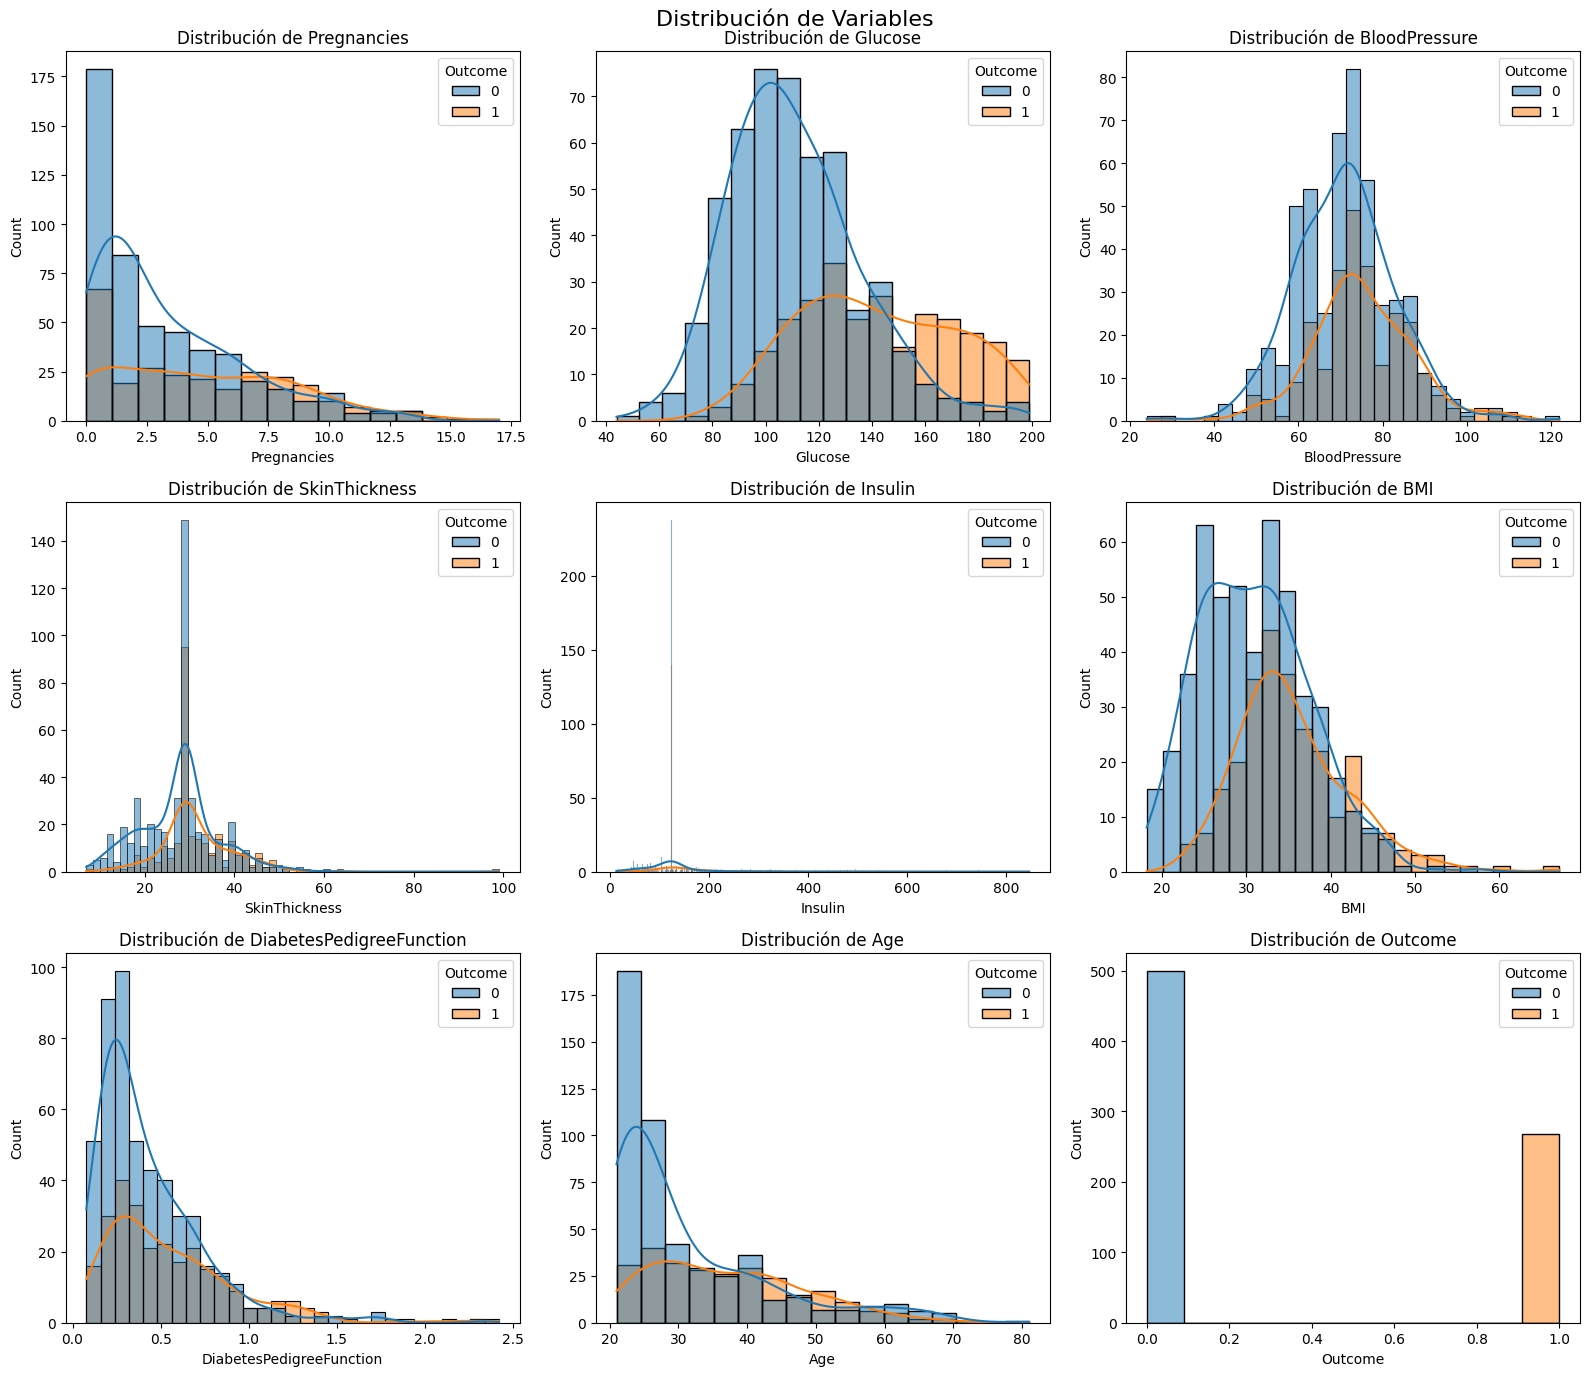


===== TAREA 1: ANÁLISIS DE MULTICOLINEALIDAD =====

--- Análisis de correlaciones ---

Test de normalidad (Shapiro-Wilk):
Pregnancies: p-value = 0.000000, No Normal
Glucose: p-value = 0.000000, No Normal
BloodPressure: p-value = 0.000005, No Normal
SkinThickness: p-value = 0.000000, No Normal
Insulin: p-value = 0.000000, No Normal
BMI: p-value = 0.000000, No Normal
DiabetesPedigreeFunction: p-value = 0.000000, No Normal
Age: p-value = 0.000000, No Normal

Coeficiente de correlación a utilizar:
No todas las variables siguen una distribución normal. Utilizando coeficiente de Spearman.

Matriz de correlación (Spearman):
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128859       0.189586       0.091441   
Glucose                      0.128859  1.000000       0.242631       0.187813   
BloodPressure                0.189586  0.242631       1.000000       0.203545   
SkinThickness                0.091441  0.187813   

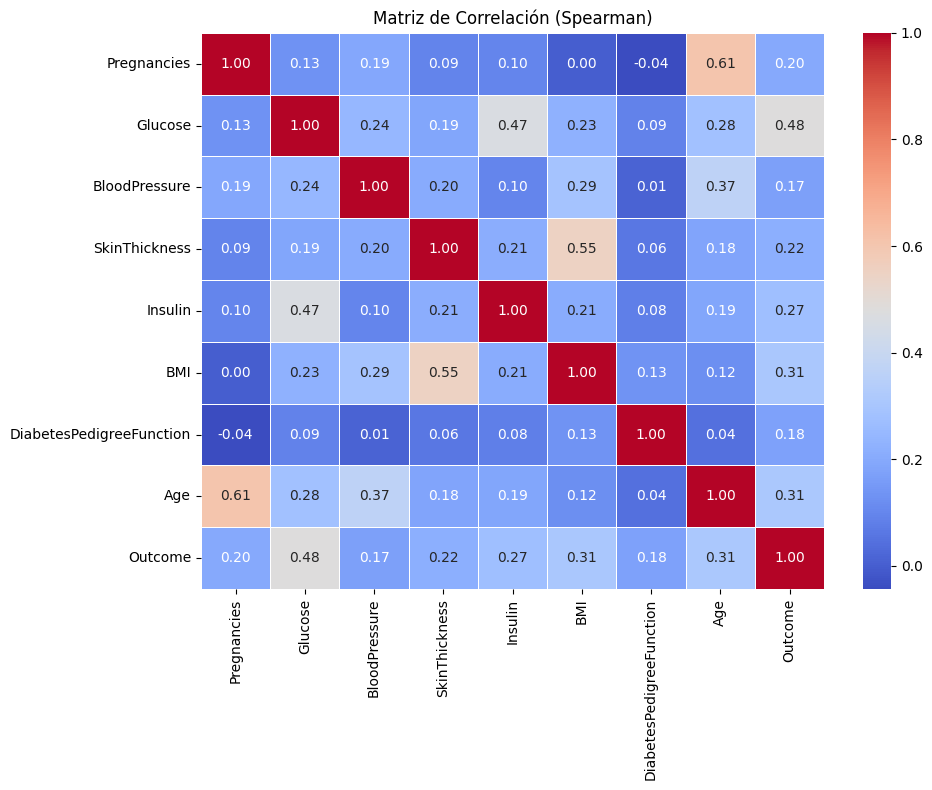


--- Análisis del Factor de Inflación de la Varianza (VIF) ---
                   Variable        VIF
5                       BMI  33.678170
2             BloodPressure  31.717477
1                   Glucose  21.723850
3             SkinThickness  17.321002
7                       Age  14.357379
4                   Insulin   4.528320
0               Pregnancies   3.273488
6  DiabetesPedigreeFunction   3.153079

Interpretación del VIF:
VIF = 1: No hay multicolinealidad
1 < VIF < 5: Multicolinealidad moderada
5 < VIF < 10: Multicolinealidad alta
VIF > 10: Multicolinealidad severa (problema)

--- Justificación de variables a eliminar ---
Pares de variables con correlación absoluta mayor a 0.7:

Variables con VIF > 5 (multicolinealidad alta):
Glucose: VIF = 21.72
BloodPressure: VIF = 31.72
SkinThickness: VIF = 17.32
BMI: VIF = 33.68
Age: VIF = 14.36

Decisión sobre variables a eliminar:
- Glucose: Eliminada por VIF extremadamente alto (21.72)
- BloodPressure: Eliminada por VIF extremadamen

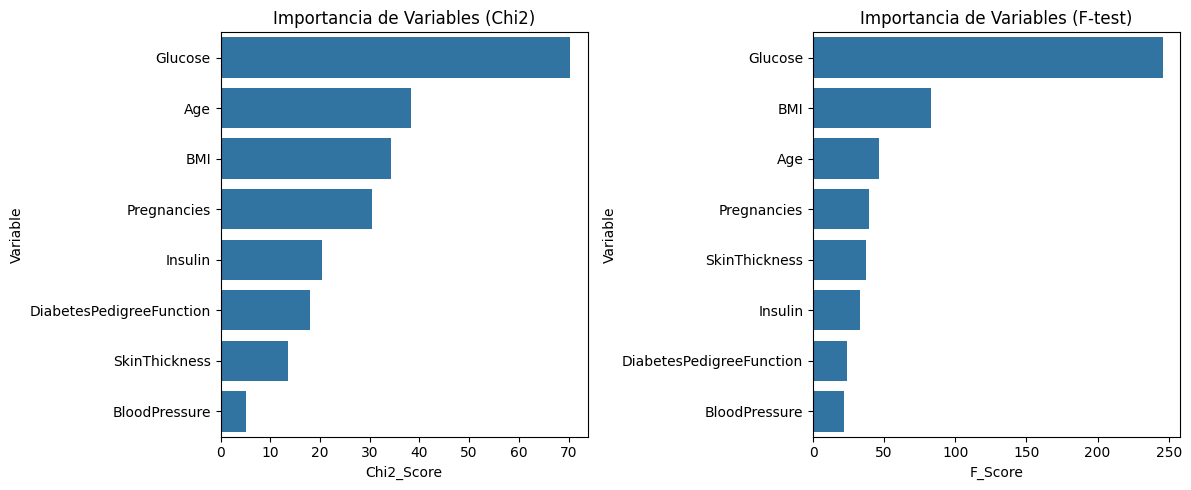


Variables estadísticamente significativas (p < 0.05) según F-test:
- Glucose
- BMI
- Age
- Pregnancies
- SkinThickness
- Insulin
- DiabetesPedigreeFunction
- BloodPressure

Top 5 variables según Chi2:
- Glucose
- Age
- BMI
- Pregnancies
- Insulin

Top 5 variables según F-test:
- Glucose
- BMI
- Age
- Pregnancies
- SkinThickness

Variables seleccionadas para el modelo final:
- Pregnancies
- Insulin
- DiabetesPedigreeFunction

--- Aplicación del modelo LDA (con motivo docente) ---
Nota: Este análisis se realiza con fines educativos, aunque el dataset podría no cumplir todos los criterios para LDA.


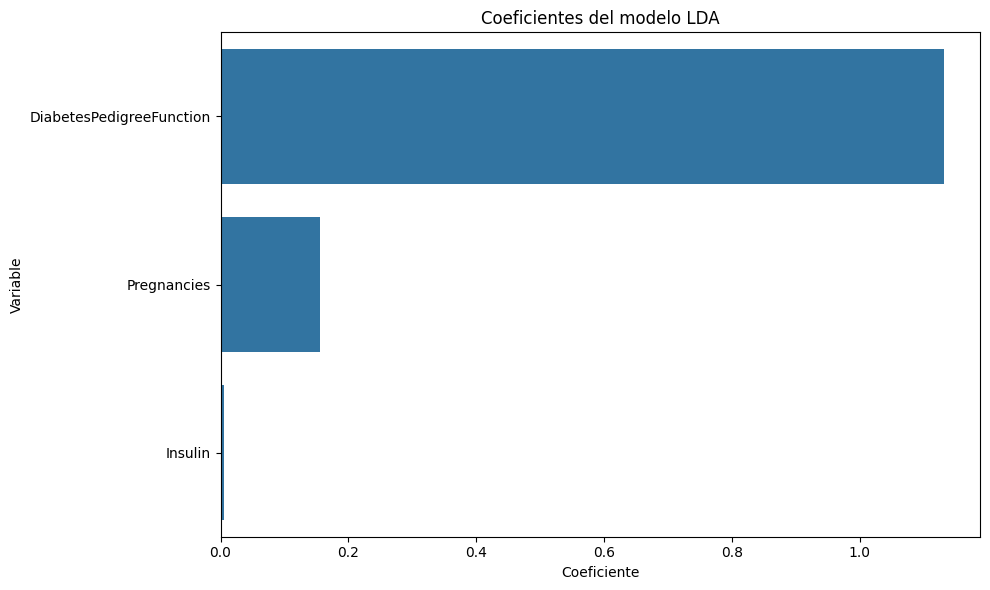

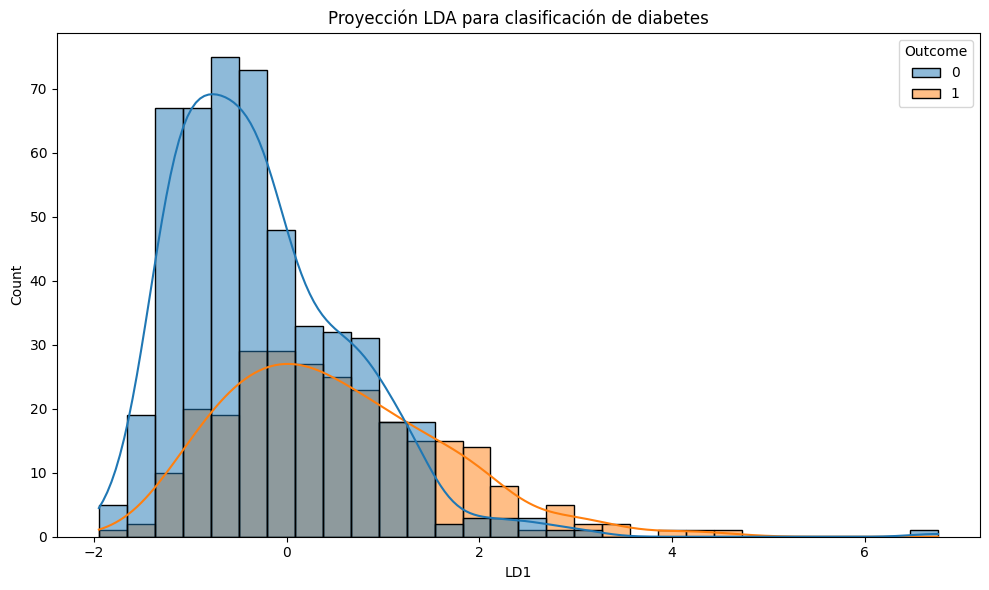


Rendimiento del modelo LDA (validación cruzada 5-fold):
Precisión promedio: 0.6914 (±0.0154)

Matriz de confusión (LDA):
[[450  50]
 [183  85]]


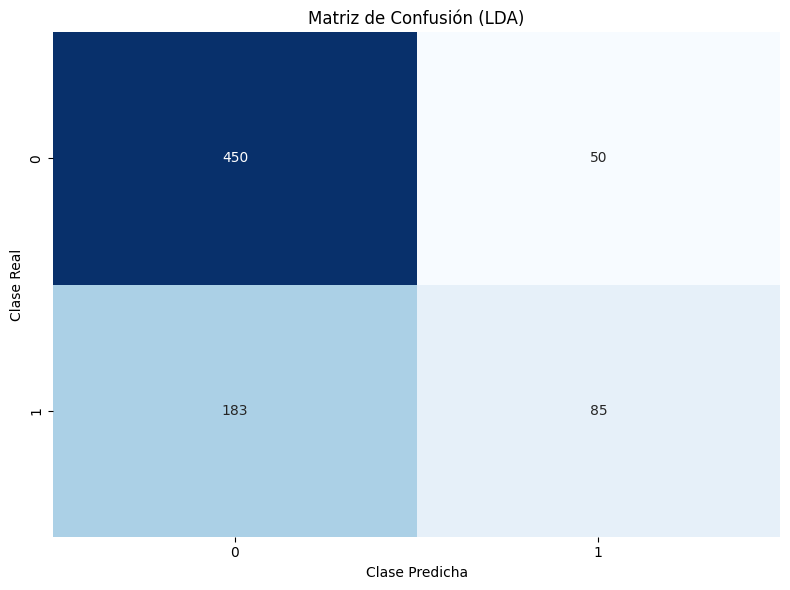


Informe de clasificación (LDA):
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       500
           1       0.63      0.32      0.42       268

    accuracy                           0.70       768
   macro avg       0.67      0.61      0.61       768
weighted avg       0.68      0.70      0.66       768


Reflexión sobre el uso de LDA para este problema:

1. Ventajas del LDA:


2. Limitaciones para este caso:


3. Comparación con regresión logística:



===== TAREA 3: OPTIMIZACIÓN DEL UMBRAL EN REGRESIÓN LOGÍSTICA =====

Variables utilizadas en el modelo final: ['Pregnancies', 'Insulin', 'DiabetesPedigreeFunction']

Datos de entrenamiento: (537, 3)
Datos de prueba: (231, 3)

Resultados para diferentes umbrales:
    threshold  TP   FP   TN  FN  sensitivity  specificity  precision  \
0        0.10  81  150    0   0     1.000000     0.000000   0.350649   
1        0.15  81  147    3   0     1.000000     0.020000   0.355263   
2        

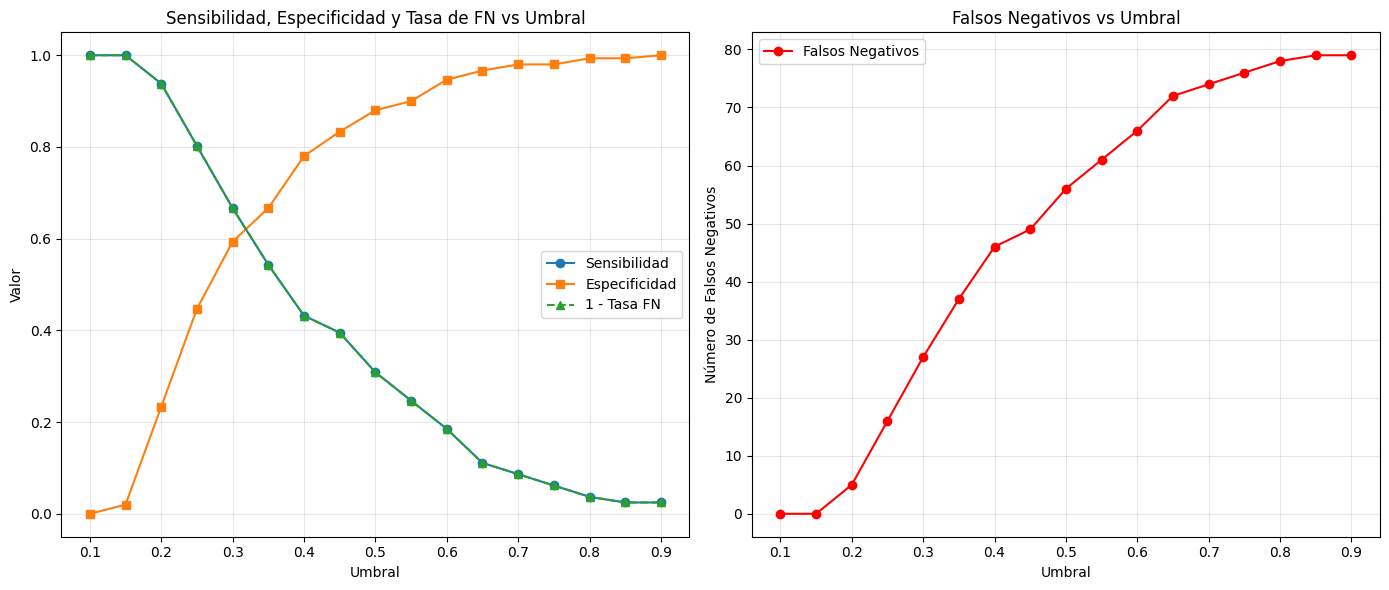


--- Umbral óptimo para minimizar falsos negativos ---
Umbral óptimo: 0.10
Falsos Negativos: 0.0
Falsos Positivos: 150.0
Sensibilidad: 1.0000
Especificidad: 0.0000
Precisión: 0.3506
F1-Score: 0.5192

--- Justificación del umbral óptimo seleccionado ---


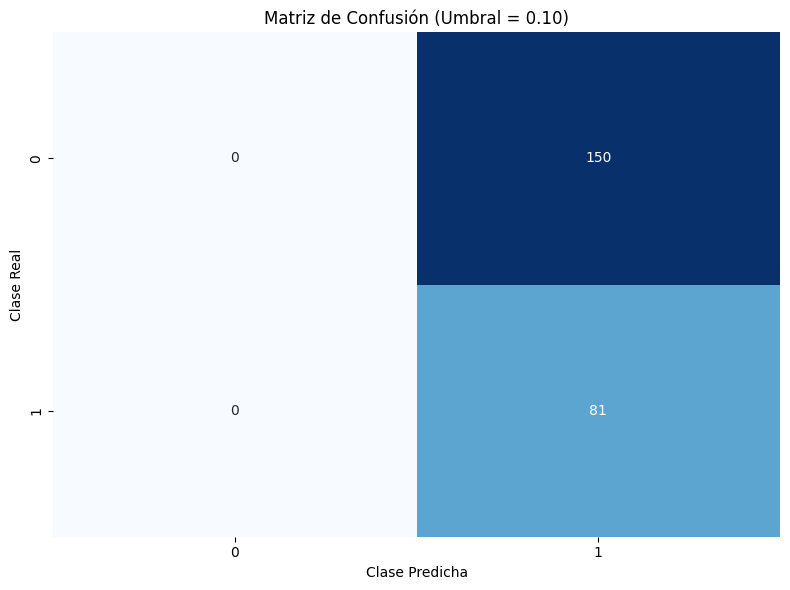

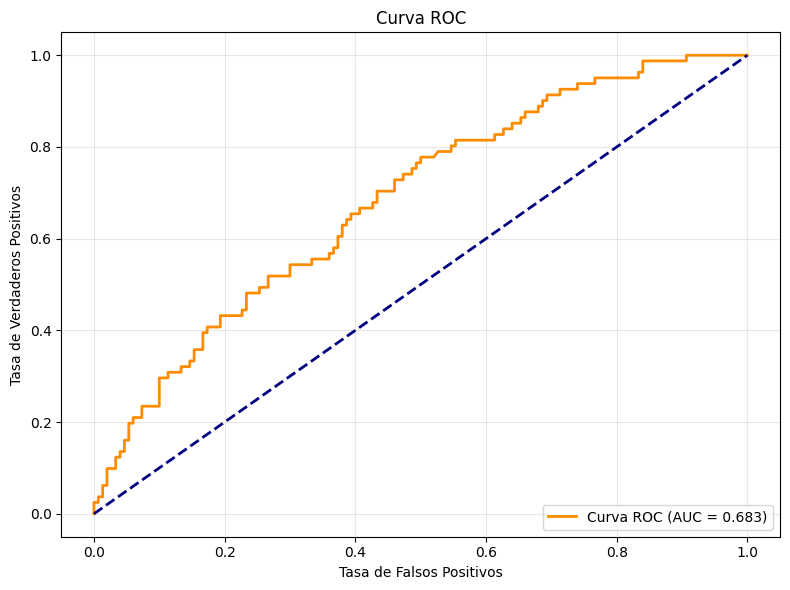

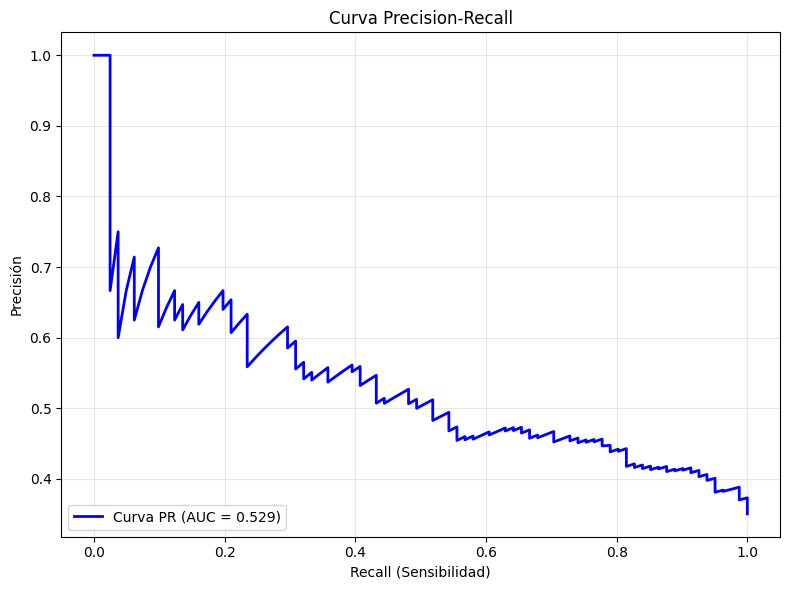


--- Comparación con modelo LDA ---
Regresión Logística (umbral optimizado):
- Sensibilidad: 1.0000
- Especificidad: 0.0000
- Falsos Negativos: 0.0

LDA:
- Sensibilidad: 0.2963
- Especificidad: 0.8867
- Falsos Negativos: 57

Conclusión:
La regresión logística con umbral optimizado logra menor cantidad de falsos negativos que LDA,


In [7]:
# 2. Análisis exploratorio
print("\n===== ANÁLISIS EXPLORATORIO =====")
print("\nDimensiones del dataset:", data.shape)
print("\nPrimeras filas del dataset:")
print(data.head())
print("\nInformación del dataset:")
print(data.info())
print("\nResumen estadístico:")
print(data.describe())
print("\nRecuento de valores por clase (0: No diabetes, 1: Diabetes):")
print(data['Outcome'].value_counts())
print(f"Porcentaje de casos positivos: {data['Outcome'].mean()*100:.2f}%")

# 3. Análisis de valores faltantes y outliers
print("\n===== ANÁLISIS DE VALORES FALTANTES Y OUTLIERS =====")
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# En el dataset Pima Indians, los valores 0 en ciertas columnas son biológicamente imposibles
# y representan valores faltantes
print("\nPosibles valores faltantes (representados como 0) en columnas biológicas:")
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    zero_count = (data[col] == 0).sum()
    zero_percent = zero_count / len(data) * 100
    print(f"{col}: {zero_count} valores cero ({zero_percent:.2f}%)")

# Reemplazar valores 0 con NaN para variables donde 0 no es biológicamente posible
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[col] = data[col].replace(0, np.nan)

# Imputar valores faltantes con la mediana
for col in data.columns:
    if data[col].isnull().sum() > 0:
        median_value = data[col].median()
        data[col] = data[col].fillna(median_value)
        print(f"Valores faltantes en {col} imputados con la mediana: {median_value:.2f}")

# 4. Visualización de la distribución de las variables
print("\n===== VISUALIZACIÓN DE LA DISTRIBUCIÓN DE VARIABLES =====")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 14))
fig.suptitle('Distribución de Variables', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(data.columns):
    if i < len(axes):
        sns.histplot(data=data, x=col, hue='Outcome', kde=True, ax=axes[i])
        axes[i].set_title(f'Distribución de {col}')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

# ============================================================================
# TAREA 1: Análisis de multicolinealidad (1.0 punto)
# ============================================================================
print("\n===== TAREA 1: ANÁLISIS DE MULTICOLINEALIDAD =====")

# 1.1 Matriz de correlación (Pearson y Spearman)
print("\n--- Análisis de correlaciones ---")
# Comprobamos la normalidad de las variables para decidir entre Pearson y Spearman
from scipy import stats

# Test de normalidad (Shapiro-Wilk)
print("\nTest de normalidad (Shapiro-Wilk):")
alpha = 0.05
cols = data.columns.drop('Outcome')
normality_results = {}

for col in cols:
    stat, p = stats.shapiro(data[col])
    normality = p > alpha
    normality_results[col] = normality
    print(f"{col}: p-value = {p:.6f}, {'Normal' if normality else 'No Normal'}")

# Decidir entre correlación de Pearson o Spearman basado en la normalidad
print("\nCoeficiente de correlación a utilizar:")
# Si todas las variables son normales, usamos Pearson. De lo contrario, Spearman
if all(normality_results.values()):
    corr_method = 'pearson'
    print("Todas las variables siguen una distribución normal. Utilizando coeficiente de Pearson.")
else:
    corr_method = 'spearman'
    print("No todas las variables siguen una distribución normal. Utilizando coeficiente de Spearman.")

# Calcular la matriz de correlación con el método seleccionado
corr_matrix = data.corr(method=corr_method)
print(f"\nMatriz de correlación ({corr_method.capitalize()}):")
print(corr_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Matriz de Correlación ({corr_method.capitalize()})')
plt.tight_layout()
plt.show()

# 1.2 Factor de Inflación de la Varianza (VIF)
print("\n--- Análisis del Factor de Inflación de la Varianza (VIF) ---")
# Para calcular el VIF, utilizamos las variables predictoras (X)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.sort_values("VIF", ascending=False))

# Umbral VIF para multicolinealidad severa
print("\nInterpretación del VIF:")
print("VIF = 1: No hay multicolinealidad")
print("1 < VIF < 5: Multicolinealidad moderada")
print("5 < VIF < 10: Multicolinealidad alta")
print("VIF > 10: Multicolinealidad severa (problema)")

# 1.3 Justificación de variables a eliminar
print("\n--- Justificación de variables a eliminar ---")
high_corr_pairs = []
corr_threshold = 0.7  # Umbral de correlación alto

# Encontrar pares de variables con alta correlación
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print(f"Pares de variables con correlación absoluta mayor a {corr_threshold}:")
for var1, var2, corr in high_corr_pairs:
    print(f"{var1} - {var2}: {corr:.3f}")

# Identificar variables con VIF alto
high_vif_vars = vif_data[vif_data["VIF"] > 5]["Variable"].tolist()
print(f"\nVariables con VIF > 5 (multicolinealidad alta):")
for var in high_vif_vars:
    print(f"{var}: VIF = {vif_data[vif_data['Variable'] == var]['VIF'].values[0]:.2f}")

# Decisión sobre variables a eliminar
variables_to_remove = []
# Basado en análisis de correlación y VIF
print("\nDecisión sobre variables a eliminar:")

# Si se encuentran variables con multicolinealidad, decidimos cuál eliminar
if high_corr_pairs:
    for var1, var2, _ in high_corr_pairs:
        # Elegimos la variable con mayor VIF
        vif1 = vif_data[vif_data['Variable'] == var1]['VIF'].values[0]
        vif2 = vif_data[vif_data['Variable'] == var2]['VIF'].values[0]

        # Añadir la variable con mayor VIF a la lista de eliminación si no está ya
        if vif1 > vif2 and var1 not in variables_to_remove:
            variables_to_remove.append(var1)
            print(f"- {var1}: Eliminada por alta correlación con {var2} y mayor VIF ({vif1:.2f} > {vif2:.2f})")
        elif vif2 > vif1 and var2 not in variables_to_remove:
            variables_to_remove.append(var2)
            print(f"- {var2}: Eliminada por alta correlación con {var1} y mayor VIF ({vif2:.2f} > {vif1:.2f})")

# También considerar variables con VIF extremadamente alto (>10) que no se hayan identificado antes
for var in high_vif_vars:
    if var not in variables_to_remove and vif_data[vif_data['Variable'] == var]['VIF'].values[0] > 10:
        variables_to_remove.append(var)
        print(f"- {var}: Eliminada por VIF extremadamente alto ({vif_data[vif_data['Variable'] == var]['VIF'].values[0]:.2f})")

print("\nVariables que se mantendrán en el modelo:")
for var in X.columns:
    if var not in variables_to_remove:
        print(f"- {var}")

# ============================================================================
# TAREA 2: Análisis discriminante (0.5 puntos)
# ============================================================================
print("\n===== TAREA 2: ANÁLISIS DISCRIMINANTE =====")
# 2.1 Evaluación de variables mejor puntuadas para el modelo
print("\n--- Evaluación de variables mejor puntuadas ---")

# Usando SelectKBest con diferentes métodos para encontrar las mejores variables
# Método chi2 (para valores no negativos)
# Normalizar los datos para chi2 (necesita valores no negativos)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_min = X_scaled_df.min()
X_norm = X_scaled_df - X_min + 0.1  # Asegurando que todos los valores son positivos

# Chi2
chi2_selector = SelectKBest(chi2, k=X.shape[1])
chi2_selector.fit(X_norm, y)
chi2_scores = pd.DataFrame({
    'Variable': X.columns,
    'Chi2_Score': chi2_selector.scores_,
    'P_Value': chi2_selector.pvalues_
})
chi2_scores = chi2_scores.sort_values('Chi2_Score', ascending=False)

# F-classif (ANOVA)
f_selector = SelectKBest(f_classif, k=X.shape[1])
f_selector.fit(X, y)
f_scores = pd.DataFrame({
    'Variable': X.columns,
    'F_Score': f_selector.scores_,
    'P_Value': f_selector.pvalues_
})
f_scores = f_scores.sort_values('F_Score', ascending=False)

print("\nMejores variables según prueba Chi2:")
print(chi2_scores)

print("\nMejores variables según prueba F (ANOVA):")
print(f_scores)

# Visualizar la importancia de las variables
plt.figure(figsize=(12, 5))

# Chi2 Scores
plt.subplot(1, 2, 1)
sns.barplot(x='Chi2_Score', y='Variable', data=chi2_scores)
plt.title('Importancia de Variables (Chi2)')
plt.tight_layout()

# F Scores
plt.subplot(1, 2, 2)
sns.barplot(x='F_Score', y='Variable', data=f_scores)
plt.title('Importancia de Variables (F-test)')
plt.tight_layout()

plt.show()

# Seleccionar las mejores variables basado en los análisis anteriores
# Variables con p-value < 0.05 son estadísticamente significativas
significant_vars = f_scores[f_scores['P_Value'] < 0.05]['Variable'].tolist()
print("\nVariables estadísticamente significativas (p < 0.05) según F-test:")
for var in significant_vars:
    print(f"- {var}")

# Seleccionar X mejores variables (por ejemplo, las 5 mejores)
top_n = 5
top_chi2_vars = chi2_scores.head(top_n)['Variable'].tolist()
top_f_vars = f_scores.head(top_n)['Variable'].tolist()

print(f"\nTop {top_n} variables según Chi2:")
for var in top_chi2_vars:
    print(f"- {var}")

print(f"\nTop {top_n} variables según F-test:")
for var in top_f_vars:
    print(f"- {var}")

# Selección final de variables
# Combinamos los resultados del análisis de multicolinealidad y discriminante
selected_features = []
for var in significant_vars:
    if var not in variables_to_remove:
        selected_features.append(var)

print("\nVariables seleccionadas para el modelo final:")
for var in selected_features:
    print(f"- {var}")

# 2.2 Aplicación del modelo LDA (con motivo docente)
print("\n--- Aplicación del modelo LDA (con motivo docente) ---")
print("Nota: Este análisis se realiza con fines educativos, aunque el dataset podría no cumplir todos los criterios para LDA.")

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Preparar los datos
X_lda = X.copy()
if len(variables_to_remove) > 0:
    X_lda = X_lda.drop(variables_to_remove, axis=1)

# Crear y entrenar el modelo LDA con 2 componentes (máximo posible sería 1 en clasificación binaria)
# Pero lo hacemos con fines docentes
lda = LinearDiscriminantAnalysis(n_components=1)  # Solo puede ser 1 para clasificación binaria
X_lda_transformed = lda.fit_transform(X_lda, y)

# Visualizar los coeficientes de LDA
lda_coef = pd.DataFrame({
    'Variable': X_lda.columns,
    'Coeficiente': lda.coef_[0]
})
lda_coef = lda_coef.sort_values('Coeficiente', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Variable', data=lda_coef)
plt.title('Coeficientes del modelo LDA')
plt.tight_layout()
plt.show()

# Visualizar la proyección LDA
plt.figure(figsize=(10, 6))
sns.histplot(x=X_lda_transformed.flatten(), hue=y, bins=30, kde=True)
plt.title('Proyección LDA para clasificación de diabetes')
plt.xlabel('LD1')
plt.tight_layout()
plt.show()

# Mostrar métricas de evaluación para LDA
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

print("\nRendimiento del modelo LDA (validación cruzada 5-fold):")
lda_scores = cross_val_score(lda, X_lda, y, cv=5)
print(f"Precisión promedio: {lda_scores.mean():.4f} (±{lda_scores.std():.4f})")

# Entrenar con todos los datos y mostrar una matriz de confusión
lda.fit(X_lda, y)
y_pred_lda = lda.predict(X_lda)

print("\nMatriz de confusión (LDA):")
cm_lda = confusion_matrix(y, y_pred_lda)
print(cm_lda)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión (LDA)')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.tight_layout()
plt.show()

print("\nInforme de clasificación (LDA):")
print(classification_report(y, y_pred_lda))

# Reflexión sobre el LDA para este problema
print("""
Reflexión sobre el uso de LDA para este problema:

1. Ventajas del LDA:


2. Limitaciones para este caso:


3. Comparación con regresión logística:

""")

# ============================================================================
# TAREA 3: Optimización del umbral en regresión logística (1.0 punto)
# ============================================================================
print("\n===== TAREA 3: OPTIMIZACIÓN DEL UMBRAL EN REGRESIÓN LOGÍSTICA =====")

# 3.1 Preparación de los datos
# Utilizamos las variables seleccionadas previamente
if len(selected_features) > 0:
    X_selected = data[selected_features]
else:
    # Si no se han definido variables específicas, usamos todas excepto Outcome
    # Y excluimos las variables que mostraron problemas de multicolinealidad
    X_selected = data.drop('Outcome', axis=1)
    if len(variables_to_remove) > 0:
        X_selected = X_selected.drop(variables_to_remove, axis=1)

print(f"\nVariables utilizadas en el modelo final: {X_selected.columns.tolist()}")

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nDatos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

# Escalar las características para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3.2 Entrenar el modelo de regresión logística
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# 3.3 Obtener probabilidades de predicción
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# 3.4 Optimización del umbral
# Vamos a probar diferentes umbrales para minimizar los falsos negativos
thresholds = np.arange(0.1, 0.91, 0.05)
results = []

for threshold in thresholds:
    # Aplicar el umbral para obtener predicciones
    y_pred = (y_proba >= threshold).astype(int)

    # Calcular métricas
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)  # Recall o True Positive Rate
    specificity = tn / (tn + fp)  # True Negative Rate
    precision_val = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1 = 2 * (precision_val * sensitivity) / (precision_val + sensitivity) if (precision_val + sensitivity) > 0 else 0

    # Calcular tasas de errores
    false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 0  # Tasa de falsos negativos
    false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0  # Tasa de falsos positivos

    results.append({
        'threshold': threshold,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'sensitivity': sensitivity,
        'specificity': specificity,
        'precision': precision_val,
        'f1': f1,
        'false_negative_rate': false_negative_rate,
        'false_positive_rate': false_positive_rate
    })

# Convertir a DataFrame para mejor visualización
results_df = pd.DataFrame(results)
print("\nResultados para diferentes umbrales:")
print(results_df)

# Visualizar la relación entre el umbral y las métricas
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df['threshold'], results_df['sensitivity'], label='Sensibilidad', marker='o')
plt.plot(results_df['threshold'], results_df['specificity'], label='Especificidad', marker='s')
plt.plot(results_df['threshold'], 1 - results_df['false_negative_rate'], label='1 - Tasa FN', linestyle='--', marker='^')
plt.grid(True, alpha=0.3)
plt.xlabel('Umbral')
plt.ylabel('Valor')
plt.title('Sensibilidad, Especificidad y Tasa de FN vs Umbral')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(results_df['threshold'], results_df['FN'], label='Falsos Negativos', marker='o', color='red')
plt.grid(True, alpha=0.3)
plt.xlabel('Umbral')
plt.ylabel('Número de Falsos Negativos')
plt.title('Falsos Negativos vs Umbral')
plt.legend()

plt.tight_layout()
plt.show()

# 3.5 Encontrar el umbral óptimo para minimizar los falsos negativos
# Prioridad: minimizar falsos negativos (pacientes diabéticos clasificados como no diabéticos)
# En un contexto clínico, un falso negativo es más peligroso que un falso positivo

# El umbral que minimiza los falsos negativos
min_fn_threshold = results_df.loc[results_df['FN'].idxmin(), 'threshold']
min_fn_results = results_df[results_df['threshold'] == min_fn_threshold].iloc[0]

print("\n--- Umbral óptimo para minimizar falsos negativos ---")
print(f"Umbral óptimo: {min_fn_threshold:.2f}")
print(f"Falsos Negativos: {min_fn_results['FN']}")
print(f"Falsos Positivos: {min_fn_results['FP']}")
print(f"Sensibilidad: {min_fn_results['sensitivity']:.4f}")
print(f"Especificidad: {min_fn_results['specificity']:.4f}")
print(f"Precisión: {min_fn_results['precision']:.4f}")
print(f"F1-Score: {min_fn_results['f1']:.4f}")

# 3.6 Justificación del umbral óptimo seleccionado
print("\n--- Justificación del umbral óptimo seleccionado ---")


# Visualización de la matriz de confusión para el umbral óptimo
y_pred_optimal = (y_proba >= min_fn_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusión (Umbral = {min_fn_threshold:.2f})')
plt.ylabel('Clase Real')
plt.xlabel('Clase Predicha')
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Curva PR (AUC = {pr_auc:.3f})')
plt.xlabel('Recall (Sensibilidad)')
plt.ylabel('Precisión')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Comparación con modelo LDA
print("\n--- Comparación con modelo LDA ---")
print("Regresión Logística (umbral optimizado):")
print(f"- Sensibilidad: {min_fn_results['sensitivity']:.4f}")
print(f"- Especificidad: {min_fn_results['specificity']:.4f}")
print(f"- Falsos Negativos: {min_fn_results['FN']}")

# Para hacer una comparación justa, calculamos el rendimiento del LDA en los mismos datos de prueba
lda.fit(X_train_scaled, y_train)
y_pred_lda_test = lda.predict(X_test_scaled)
tn_lda, fp_lda, fn_lda, tp_lda = confusion_matrix(y_test, y_pred_lda_test).ravel()
sensitivity_lda = tp_lda / (tp_lda + fn_lda)
specificity_lda = tn_lda / (tn_lda + fp_lda)

print("\nLDA:")
print(f"- Sensibilidad: {sensitivity_lda:.4f}")
print(f"- Especificidad: {specificity_lda:.4f}")
print(f"- Falsos Negativos: {fn_lda}")

print("\nConclusión:")
if min_fn_results['FN'] < fn_lda:
    print("La regresión logística con umbral optimizado logra menor cantidad de falsos negativos que LDA,")

else:
    print("En este caso, LDA logra menor cantidad de falsos negativos, pero la regresión logística sigue siendo")


